In [4]:
import numpy as np
import random
import cv2
from matplotlib import pyplot as plt #for all ur plotting needs

In [5]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

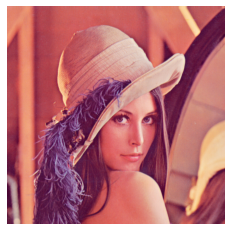

In [26]:
image_color = cv2.imread('lena.png') 
plt.axis("off")
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))


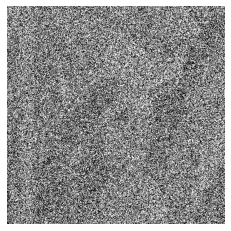

In [33]:
image = cv2.imread('lena.png',0) # Only for grayscale image
noise_img = sp_noise(image,0.4)
plt.axis("off")
plt.imshow(noise_img,cmap='gray')

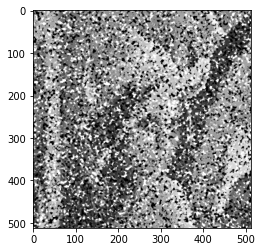

In [30]:
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(noise_img,-1,kernel)
median = cv2.medianBlur(noise_img,5)

plt.imshow(median,cmap='gray')

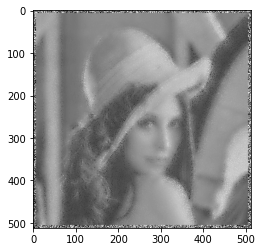

In [34]:
def filtru(img, window_size):
    h, w = img.shape
    
    for i in range(window_size, h - window_size):
        for j in range(window_size, w - window_size):
            if img[i,j] == 0 or img[i,j] == 255:
                
                vect = np.sort( img[i-window_size:i+window_size+1, j-window_size:j+window_size+1 ].reshape(-1) )
                
                u_vect = np.unique(vect)
                not_noise_vect = []
                
                ok = True
                for elem in u_vect:
                    if( elem != 0 or elem != 255):
                        not_noise_vect.append(elem)
                        ok = False
                        
                if ok == True:
                    img[i,j] = 127
                    continue
                
                # print("fgxdfg")
                
                med = np.mean(not_noise_vect)
                # img[i,j] = vect[ len(vect) // 2 ]
                img[i,j] = med

                

    return img
           
new_noise =  noise_img.copy()      
new_img = filtru(new_noise, 7)

plt.imshow(new_img,cmap='gray')     
    